In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import re
from sklearn.metrics import roc_curve, auc
from sklearn import ensemble, preprocessing, metrics


In [2]:
df=pd.read_csv('dataset/table4.csv') # 載入資料
# df=pd.read_csv('dataset/tb4_5k.csv') # 載入資料

In [ ]:
df.columns

In [3]:
df_10k = df

In [4]:
df_10k = df[df.loc[:,'user']<5001]
df_10k.shape

(108588, 34)

In [5]:
len(df_10k.loc[:,'user'].unique())

5000

In [ ]:
df_10k.to_csv('tb4_50k.csv',index = False)

In [ ]:
# df_10k=pd.read_csv('dataset/table3_10k.csv')

In [ ]:
df_10k.shape

In [ ]:
df_10k.head(5)

In [ ]:
df_10k.isnull().any()

In [ ]:
df_10k.info()

In [ ]:
df_10k.columns

## 整理表格

In [6]:
df_10k = df_10k.drop('user_cate', axis = 1)
df_10k = df_10k.drop('user_ad_pid', axis = 1)
df_10k = df_10k.drop('cnt_percentage_total', axis = 1)
df_10k = df_10k.drop('cnt_clk', axis = 1)
df_10k = df_10k.drop('cnt_nonclk', axis = 1)

In [7]:
to_Obj =['user', 'adgroup_id', 'pid', 'cate_id', 'campaign_id', 'customer',
       'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level',
       'brand_New', 'click_or_not']
for col in to_Obj:
    df_10k[col]=df_10k[col].astype(str)


In [8]:
to_int8 =['pv_1', 'cart_1',
       'fav_1', 'buy_1', 'pv_2', 'cart_2', 'fav_2', 'buy_2', 'pv_3', 'cart_3',
       'fav_3', 'buy_3']
for col in to_int8:
    df_10k[col]=df_10k[col].astype(np.int8)


In [9]:
df_10k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108588 entries, 16 to 23241904
Data columns (total 29 columns):
user                    108588 non-null object
adgroup_id              108588 non-null object
pid                     108588 non-null object
cate_id                 108588 non-null object
campaign_id             108588 non-null object
customer                108588 non-null object
price                   108588 non-null float64
cms_segid               108588 non-null object
cms_group_id            108588 non-null object
final_gender_code       108588 non-null object
age_level               108588 non-null object
pvalue_level            108588 non-null object
shopping_level          108588 non-null object
occupation              108588 non-null object
new_user_class_level    108588 non-null object
pv_1                    108588 non-null int8
cart_1                  108588 non-null int8
fav_1                   108588 non-null int8
buy_1                   108588 non-null int8


### split to train/test/val

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_10k.head(5)

,user,adgroup_id,pid,cate_id,campaign_id,customer,price,cms_segid,cms_group_id,final_gender_code,...,pv_2,cart_2,fav_2,buy_2,pv_3,cart_3,fav_3,buy_3,brand_New,click_or_not
16,1029,715052,430539_1007,1665,353703,164557,299.0,92,11,1,...,35,0,0,0,22,0,0,0,999999999,0
209,3829,218591,430548_1007,6736,275364,34256,169.0,0,2,2,...,0,0,0,0,0,0,0,0,999999999,0
235,4418,735368,430539_1007,6300,118727,9197,333.0,34,4,2,...,10,0,0,0,6,0,0,0,422876,0
682,2483,102655,430548_1007,9713,189503,185484,24.0,0,4,2,...,0,0,0,0,16,0,0,0,999999999,0
1216,167,502180,430548_1007,8111,107738,51598,258.0,7,2,2,...,17,0,0,0,30,0,0,0,21837,0


In [12]:
#split 'target' in df_train & df_test
x = df_10k.drop('click_or_not', axis = 1).values
y = df_10k['click_or_not'].values

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)
divtest_x, val_x, divtest_y, val_y = train_test_split(test_x, test_y, test_size=0.5)

In [ ]:
df_10k_t1.columns

In [ ]:
df_10k_t1 =df_10k
# df_10k_t1 = df_10k.drop('adgroup_id', axis = 1)
df_10k_t1 = df_10k.drop('pid', axis = 1)
# df_10k_t1 = df_10k.drop('pvalue_level', axis = 1)
# df_10k_t1 = df_10k.drop('user', axis = 1)
df_10k_t1 = df_10k.drop('campaign_id', axis = 1)
df_10k_t1 = df_10k.drop('customer', axis = 1)
df_10k_t1 = df_10k.drop('pvalue_level', axis = 1)
df_10k_t1 = df_10k.drop('cms_group_id', axis = 1)


x1 = df_10k_t1.drop('click_or_not', axis = 1).values
y1 = df_10k_t1['click_or_not'].values

train1_x, test1_x, train1_y, test1_y = train_test_split(x1, y1, test_size=0.3)
divtest1_x, val1_x, divtest1_y, val1_y = train_test_split(test1_x, test1_y, test_size=0.5)

### Decision Tree

In [13]:
from sklearn import tree
from sklearn.metrics import classification_report

In [14]:
%%time
clf=tree.DecisionTreeClassifier(class_weight="balanced",criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
model=clf.fit(train_x,train_y)

CPU times: user 1.15 s, sys: 24 ms, total: 1.18 s
Wall time: 1.17 s


In [15]:
%%time
trainPredY=model.predict(train_x)
testPredY=model.predict(divtest_x)
valPredY=model.predict(val_x)

print( classification_report(train_y,trainPredY) )
print( classification_report(divtest_y,testPredY) )
print( classification_report(val_y,valPredY) )

             precision    recall  f1-score   support

          0       0.96      0.56      0.71     71752
          1       0.08      0.64      0.14      4259

avg / total       0.91      0.57      0.68     76011

             precision    recall  f1-score   support

          0       0.96      0.56      0.71     15347
          1       0.08      0.59      0.14       941

avg / total       0.91      0.56      0.67     16288

             precision    recall  f1-score   support

          0       0.96      0.56      0.71     15390
          1       0.07      0.60      0.13       899

avg / total       0.91      0.56      0.67     16289

CPU times: user 1.63 s, sys: 44 ms, total: 1.67 s
Wall time: 1.66 s


# Random Forest

In [16]:
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble.forest import RandomForestClassifier

## param1: default

In [17]:
clf = RandomForestClassifier(oob_score=True)
model=clf.fit(train_x,train_y)

/opt/intel/intelpython3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/intel/intelpython3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/intel/intelpython3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [18]:
model.oob_score_

0.9325623922853271

In [19]:
%%time
trainPredY=model.predict(train_x)
testPredY=model.predict(test_x)
valPredY=model.predict(val_x)

print(classification_report(train_y,trainPredY))
print(classification_report(test_y,testPredY))


             precision    recall  f1-score   support

          0       0.99      1.00      0.99     71752
          1       1.00      0.78      0.88      4259

avg / total       0.99      0.99      0.99     76011

             precision    recall  f1-score   support

          0       0.94      1.00      0.97     30737
          1       0.14      0.01      0.02      1840

avg / total       0.90      0.94      0.92     32577

CPU times: user 2.66 s, sys: 84 ms, total: 2.74 s
Wall time: 1.92 s


#### feature importance

In [ ]:
model.feature_importances_

In [ ]:
# train_y_ture = np.array(train_y)
# train_y_pred = model.oob_decision_function_ [:,1]
# train_fpr, train_tpr, thresholds = metrics.roc_curve(train_y_ture, train_y_pred, pos_label='1')
# train_auc = metrics.auc(train_fpr, train_tpr)

# test_y_ture = np.array(test_y)
# test_y_pred = model.predict_proba(test_x)[:,1]
# test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
# test_auc = metrics.auc(test_fpr, test_tpr)

# plt.title('ROC Validation')
# plt.plot(train_fpr,train_tpr,'b',label='Train AUC = %0.2f'%train_auc, color = 'green')
# plt.plot(test_fpr,test_tpr,'b',label='Test AUC = %0.2f'%test_auc)

# plt.legend(loc='lower right')
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [ ]:
features = df_10k.drop('click_or_not', axis = 1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## param 2: n_estimators

In [20]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [21]:
model=clf.fit(train_x,train_y)
trainPredY=model.predict(train_x)
testPredY=model.predict(test_x)

test_y_ture = np.array(test_y)
test_y_pred = model.predict_proba(test_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

print('  test_auc:',test_auc)
print('  odel.oob_score_ :',model.oob_score_)
print( classification_report(train_y,trainPredY) )
print( classification_report(test_y,testPredY) )

  test_auc: 0.5989666186199609
  odel.oob_score_ : 0.5521963926273828
             precision    recall  f1-score   support

          0       0.96      0.54      0.69     71752
          1       0.07      0.63      0.13      4259

avg / total       0.91      0.55      0.66     76011

             precision    recall  f1-score   support

          0       0.96      0.54      0.69     30737
          1       0.07      0.59      0.13      1840

avg / total       0.91      0.54      0.66     32577



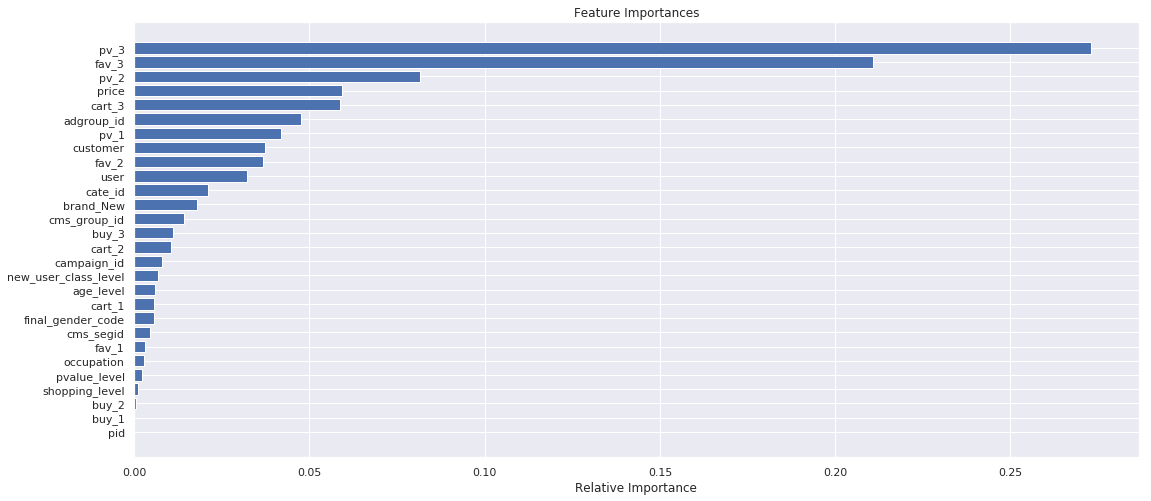

In [22]:
features = df_10k.drop('click_or_not', axis = 1).columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(18,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

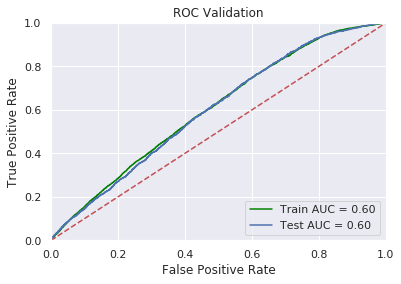

In [23]:
train_y_ture = np.array(train_y)
train_y_pred = model.oob_decision_function_ [:,1]
train_fpr, train_tpr, thresholds = metrics.roc_curve(train_y_ture, train_y_pred, pos_label='1')
train_auc = metrics.auc(train_fpr, train_tpr)

test_y_ture = np.array(test_y)
test_y_pred = model.predict_proba(test_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

plt.title('ROC Validation')
plt.plot(train_fpr,train_tpr,'b',label='Train AUC = %0.2f'%train_auc, color = 'green')
plt.plot(test_fpr,test_tpr,'b',label='Test AUC = %0.2f'%test_auc)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy',max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=105,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [ ]:
param_grid = { 
    'n_estimators': [150, 200],
    'max_depth' : [4,5,6,7,8],
    
}

In [ ]:
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_x, train_y)

In [ ]:
CV_rfc.best_params_

## param3

In [ ]:
n_estimators =[100,150,200,250]
max_dep = [4,5,6,7]
for i in n_estimators:
    for j in max_dep:
        clf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                    criterion='entropy', max_depth=j, max_features='auto',
                    max_leaf_nodes=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=50,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=i, n_jobs=1, oob_score=True, random_state=1,
                    verbose=0, warm_start=False)

        model=clf.fit(train_x,train_y)
        trainPredY=model.predict(train_x)
        testPredY=model.predict(test_x)
        test_y_ture = np.array(test_y)
        test_y_pred = model.predict_proba(test_x)[:,1]
        test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
        test_auc = metrics.auc(test_fpr, test_tpr)

        print('n_estimators -------------------->', i)
        print('max_depth -------------------->', j)

        print('  test_auc:',test_auc)
        print('model.oob_score_ :',model.oob_score_)
        print( classification_report(train_y,trainPredY) )
        print( classification_report(test_y,testPredY) )

In [25]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=250,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [26]:
model=clf.fit(train_x,train_y)
trainPredY=model.predict(train_x)
testPredY=model.predict(test_x)

test_y_ture = np.array(test_y)
test_y_pred = model.predict_proba(test_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

print('  test_auc:',test_auc)
print('  model.oob_score_ :',model.oob_score_)
print( classification_report(train_y,trainPredY) )
print( classification_report(test_y,testPredY) )

  test_auc: 0.636632197634631
  model.oob_score_ : 0.5671942218889371
             precision    recall  f1-score   support

          0       0.97      0.57      0.72     71752
          1       0.09      0.72      0.16      4259

avg / total       0.92      0.58      0.69     76011

             precision    recall  f1-score   support

          0       0.96      0.56      0.71     30737
          1       0.08      0.64      0.14      1840

avg / total       0.91      0.57      0.68     32577



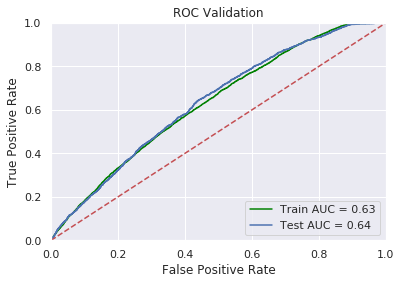

In [27]:
train_y_ture = np.array(train_y)
train_y_pred = model.oob_decision_function_ [:,1]
train_fpr, train_tpr, thresholds = metrics.roc_curve(train_y_ture, train_y_pred, pos_label='1')
train_auc = metrics.auc(train_fpr, train_tpr)


test_y_ture = np.array(test_y)
test_y_pred = model.predict_proba(test_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

plt.title('ROC Validation')
plt.plot(train_fpr,train_tpr,'b',label='Train AUC = %0.2f'%train_auc, color = 'green')
plt.plot(test_fpr,test_tpr,'b',label='Test AUC = %0.2f'%test_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(test_y, testPredY) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(test_y, testPredY)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
model.feature_importances_

# test1

In [ ]:
# n_estimators =[150,250,200,250]
# for i in n_estimators:
#     clf = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
#                 criterion='entropy', max_depth=5, max_features='auto',
#                 max_leaf_nodes=None, min_impurity_decrease=0.0,
#                 min_impurity_split=None, min_samples_leaf=50,
#                 min_samples_split=2, min_weight_fraction_leaf=0.0,
#                 n_estimators=i, n_jobs=1, oob_score=True, random_state=1,
#                 verbose=0, warm_start=False)

#     model=clf.fit(train_x,train_y)
#     trainPredY=model.predict(train_x)
#     testPredY=model.predict(test_x)
#     test_y_ture = np.array(test_y)
#     test_y_pred = model.predict_proba(test_x)[:,1]
#     test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
#     test_auc = metrics.auc(test_fpr, test_tpr)

#     print('max_depth -------------------->', i)
#     print('  test_auc:',test_auc)
#     print('model.oob_score_ :',model.oob_score_)
# #     print( classification_report(train_y,trainPredY) )
#     print( classification_report(test_y,testPredY) )

In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=8, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [ ]:
model=clf.fit(train1_x,train1_y)
trainPredY=model.predict(train1_x)
testPredY=model.predict(test1_x)

test_y_ture = np.array(test1_y)
test_y_pred = model.predict_proba(test1_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

print('  test_auc:',test_auc)
print('  model.oob_score_ :',model.oob_score_)
print( classification_report(train_y,trainPredY) )
print( classification_report(test_y,testPredY) )

In [ ]:
train_y_ture = np.array(train1_y)
train_y_pred = model.oob_decision_function_ [:,1]
train_fpr, train_tpr, thresholds = metrics.roc_curve(train_y_ture, train_y_pred, pos_label='1')
train_auc = metrics.auc(train_fpr, train_tpr)


test_y_ture = np.array(test1_y)
test_y_pred = model.predict_proba(test1_x)[:,1]
test_fpr, test_tpr, test_thresholds = metrics.roc_curve(test_y_ture, test_y_pred, pos_label='1')
test_auc = metrics.auc(test_fpr, test_tpr)

plt.title('ROC Validation')
plt.plot(train_fpr,train_tpr,'b',label='Train AUC = %0.2f'%train_auc, color = 'green')
plt.plot(test_fpr,test_tpr,'b',label='Test AUC = %0.2f'%test_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1]); plt.ylim([0,1])
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(test_y, testPredY) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(test_y, testPredY)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
model.feature_importances_